# Jupyter Notebook of Machine Learning House Price Prediction

## Import Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [2]:
data = pd.read_csv("data/data.csv")

### Check Loaded Datasets

#### Get Datasets Sample

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Get Datasets Sample from Beginning

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Get Datasets Sample from Bottom

In [5]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#### Get Datasets Description

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Get Datasets Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Cleansing Datasets

#### Clean Not a Number Values

Our datasets have some missing value in `total_bedrooms` so we need to clean it

In [8]:
data.dropna(inplace=True)

#### Check Back Datasets

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Spliting Data Train and Test

Define what become X and Y, where X is input value and Y should be the output value. In this case Y should be the `median_house_value`

In [11]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

Create x_train, x_test, y_train, and y_test by spliting it with test size 20% of our datasets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Data Analysis

Create `train_data` by joining `x_train` data with `y_train` data

In [13]:
train_data = x_train.join(y_train)

Print and Check our `train_data` Datasets

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16027,-122.45,37.73,52.0,1350.0,241.0,752.0,246.0,3.2448,NEAR BAY,266200.0
16273,-121.24,37.93,21.0,1185.0,237.0,960.0,245.0,2.0893,INLAND,65000.0
1891,-120.00,38.92,17.0,1106.0,207.0,466.0,180.0,3.3295,INLAND,126600.0
2793,-118.30,37.17,22.0,3480.0,673.0,1541.0,636.0,2.7500,INLAND,94500.0
9275,-122.57,38.11,32.0,3521.0,748.0,1706.0,723.0,3.4705,NEAR BAY,228600.0
...,...,...,...,...,...,...,...,...,...,...
13976,-116.98,34.13,16.0,2098.0,449.0,342.0,143.0,4.0333,INLAND,133900.0
19969,-119.09,36.21,38.0,1901.0,453.0,1613.0,400.0,1.8828,INLAND,44600.0
518,-122.24,37.82,52.0,3665.0,517.0,1470.0,520.0,6.1550,NEAR BAY,398600.0
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,NEAR OCEAN,100000.0


### Show Histogram and Heatmap of Train Data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

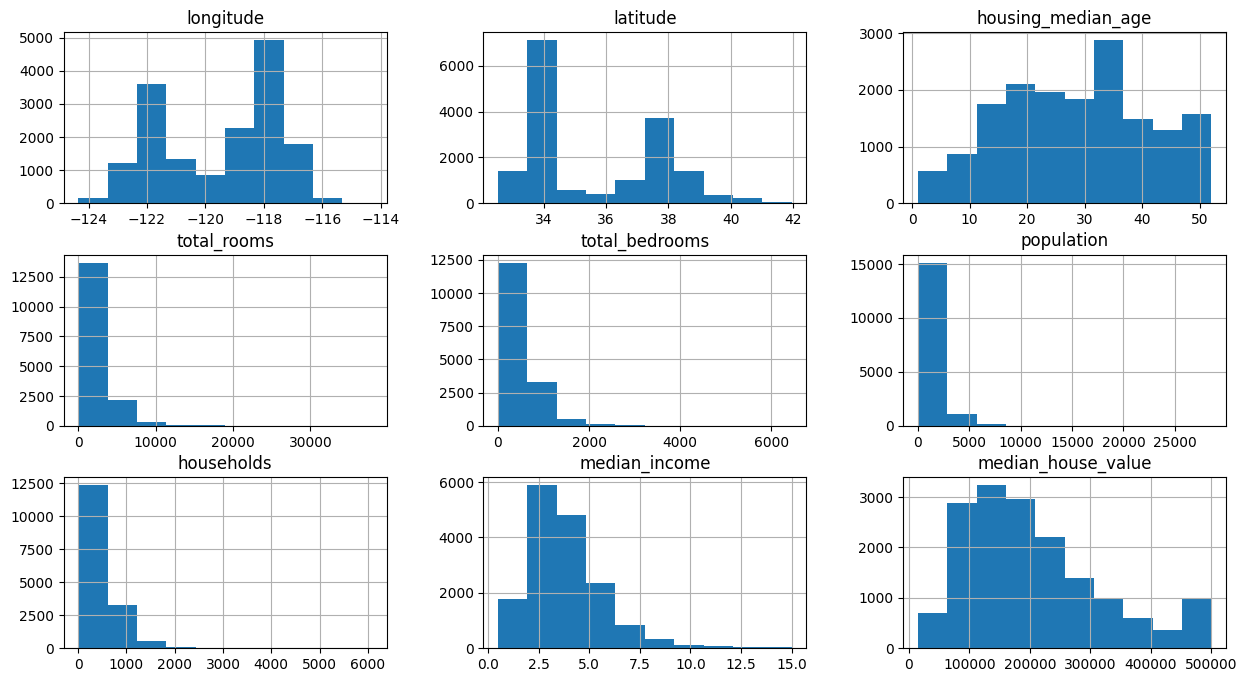

In [15]:
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

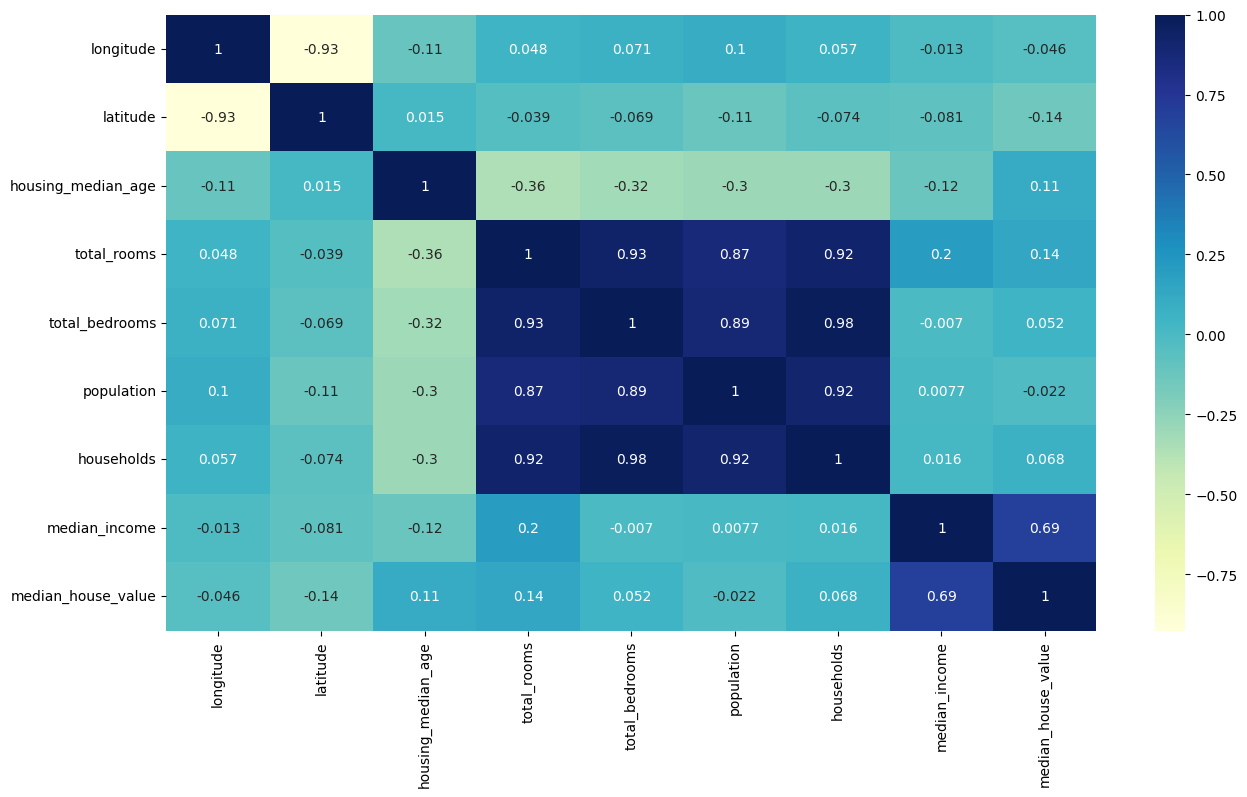

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

### Data Pre-Processing

#### Normalize Data Distribution

Fix skewed data from Histogram and make it in Normal Gausian distribution

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

Check Back our Train Data in Histogram format

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

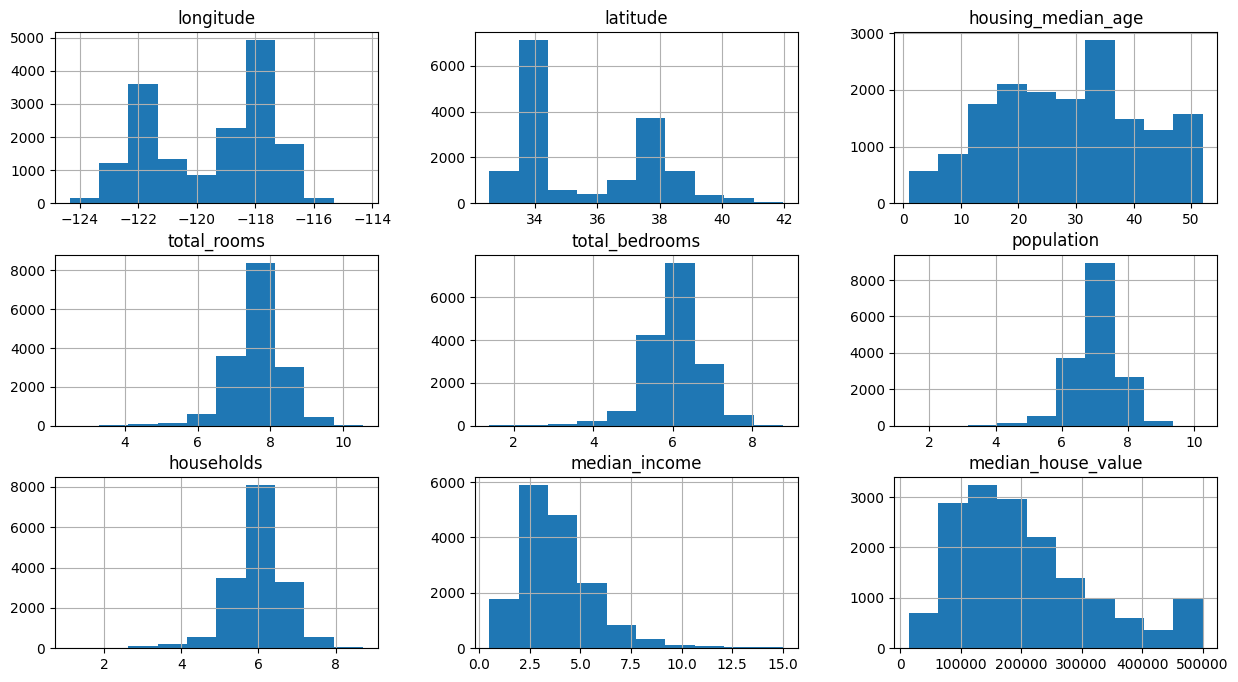

In [18]:
train_data.hist(figsize=(15, 8))

#### Convert String Value Data to Numeric format

Our Train Data has `ocean_proximity` field where the values is in String format not Numeric format. Where in Data Science computation only can be done in Numeric format. So we need to change the `ocean_proximity` as additional field with Numeric format

In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

Print out our new Train Data with joined Ocean Proximity Converted in Numeric format

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16027,-122.45,37.73,52.0,7.208600,5.488938,6.624065,5.509388,3.2448,266200.0,0,0,0,1,0
16273,-121.24,37.93,21.0,7.078342,5.472271,6.867974,5.505332,2.0893,65000.0,0,1,0,0,0
1891,-120.00,38.92,17.0,7.009409,5.337538,6.146329,5.198497,3.3295,126600.0,0,1,0,0,0
2793,-118.30,37.17,22.0,8.155075,6.513230,7.340836,6.456770,2.7500,94500.0,0,1,0,0,0
9275,-122.57,38.11,32.0,8.166784,6.618739,7.442493,6.584791,3.4705,228600.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13976,-116.98,34.13,16.0,7.649216,6.109248,5.837730,4.969813,4.0333,133900.0,0,1,0,0,0
19969,-119.09,36.21,38.0,7.550661,6.118097,7.386471,5.993961,1.8828,44600.0,0,1,0,0,0
518,-122.24,37.82,52.0,8.206856,6.249975,7.293698,6.255750,6.1550,398600.0,0,0,0,1,0
14501,-117.23,32.86,16.0,7.090910,6.150603,6.475433,6.095825,3.0450,100000.0,0,0,0,0,1


Check back our Train Data correlation in Heatmap format

<AxesSubplot:>

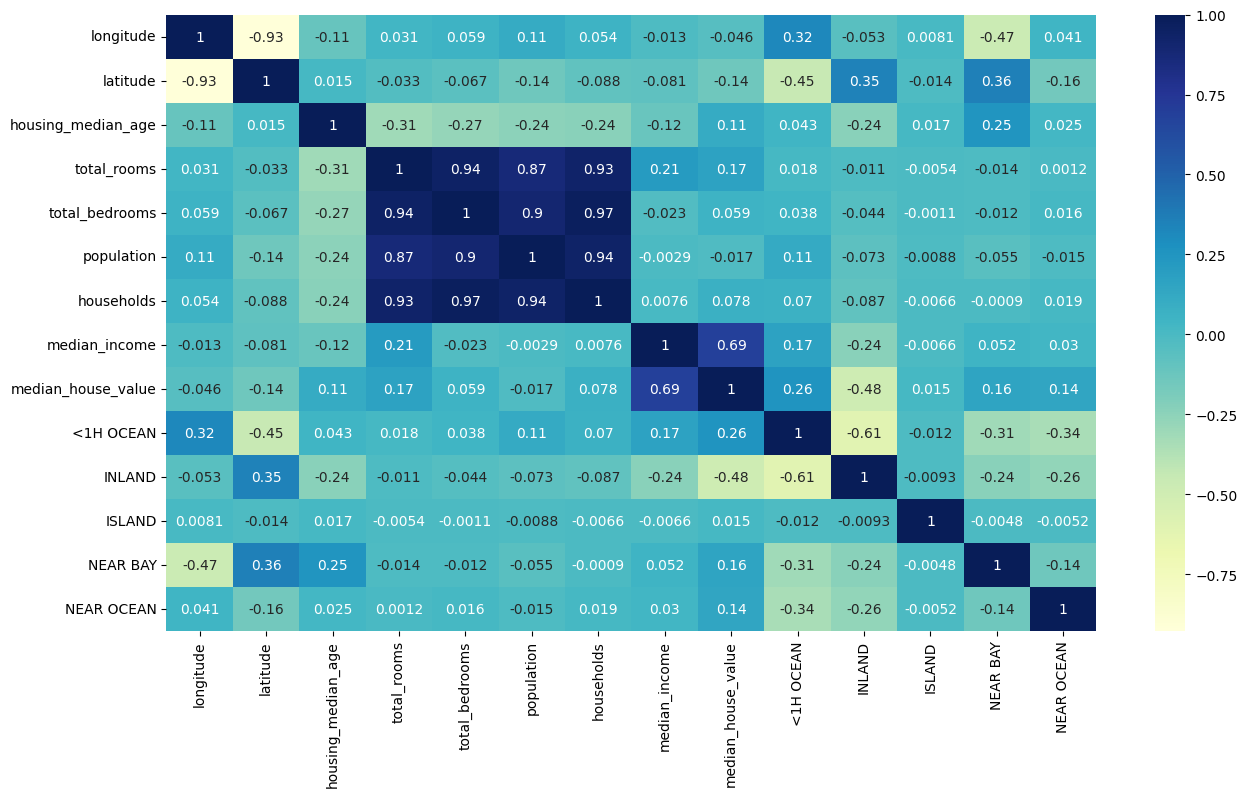

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

We found something interesting where the house location can impact the price of the house in `median_house_value`. So let's map it using Seaborn Scatter Plot

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

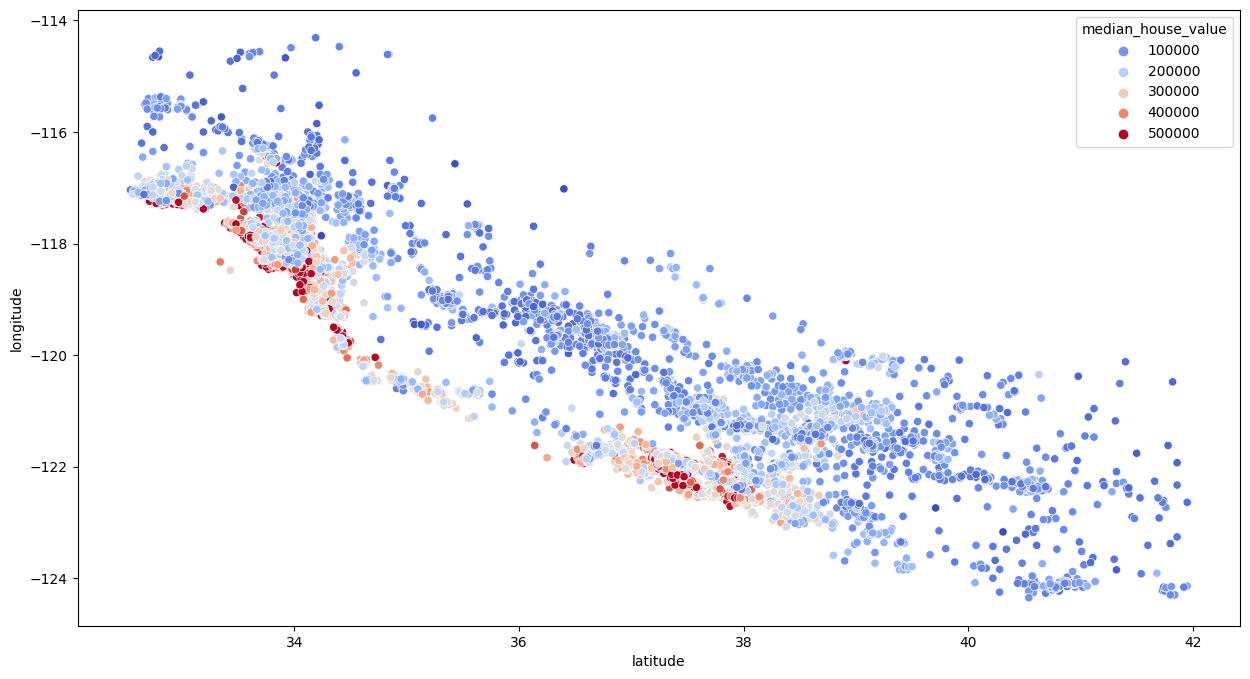

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

The more `red` the color mean the more expensive the house pricing, and the more `blue` mean the less expensive, where the dot potition is representing the location based on coordinate of latitude and longitude. We can see from the Scatter Plot that more near the house location with the ocean then the price is also more expensive. From here we can make the location as feature parameter

### Featuring Data

From the Heatmap we can see that there are also correlation beetween `total_rooms` with `total_bedrooms` and `total_rooms` with `households` where more `total_rooms` can effect the the `total_bedrooms` also `housholds`. So we need to calculate the the `bedroom_ration` and `households_rooms`

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

Check back our correlation heatmap for new paramter of `bedroom_ratio` and `household_rooms`

<AxesSubplot:>

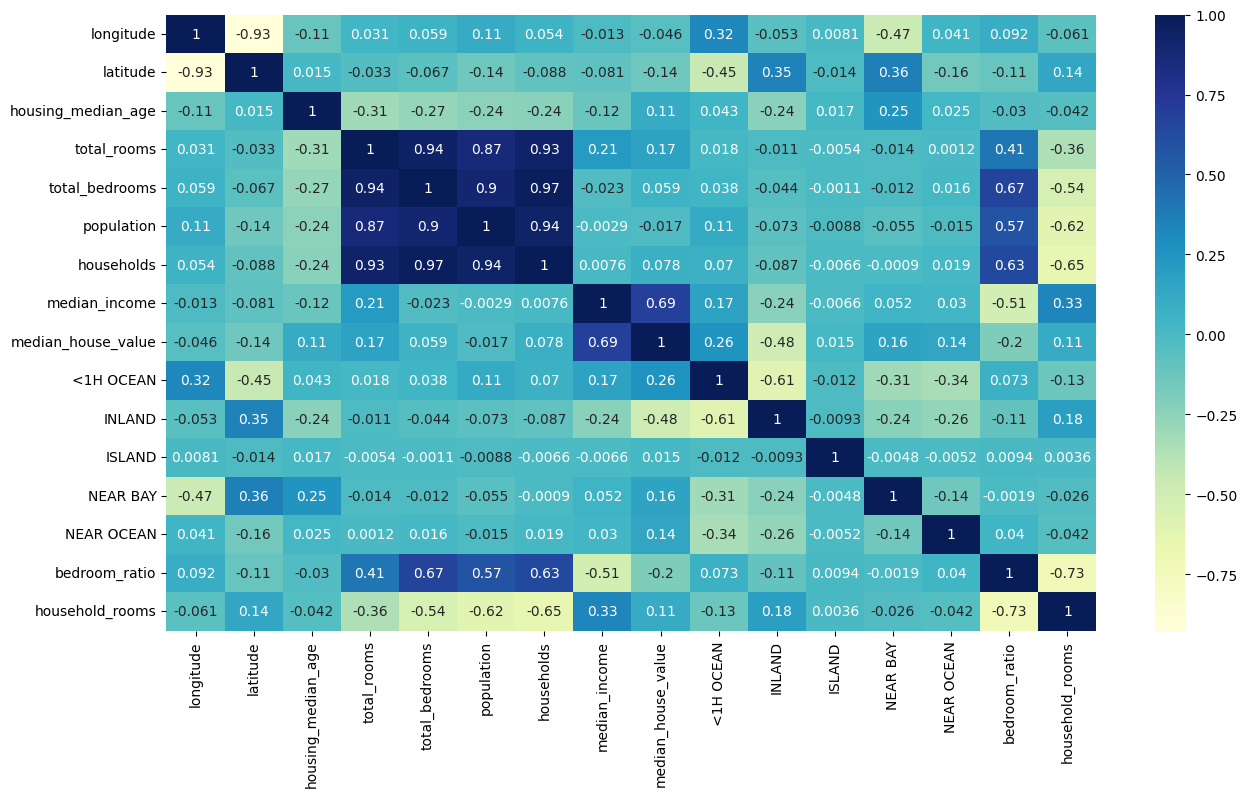

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

We can see that `bedroom_ratio` is not much correlated with `median_house_value` with negative value of correlation, but `household_rooms` got good correlation rather than `households` it self to `median_house_value`

## Data Training

### Initialize Required Variables

In [25]:
# Intialize Standard Scaler
scaler_standard = StandardScaler()

# Intialize Min Max Scaler
scaler_minmax = MinMaxScaler()

# Set Input (x) and Output (y) from Train Data
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# Scale Input (x) from Train Data with Standard Scaler
x_train_scale_standard = scaler_standard.fit_transform(x_train)

# Scale Input (x) from Train Data with Min Max Scaler
x_train_scale_minmax = scaler_minmax.fit_transform(x_train)

# Create Test Data
test_data = x_test.join(y_test)

# Normalize Test Data
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Normalize Test Data String to Numeric Format
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Add Feature Data Parameters to Test Data
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Set Input (x) and Output (y) from Test Data
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

# Scale Input (x) from Train Data with Standard Scaler
x_test_scale_standard = scaler_standard.transform(x_test)

# Scale Input (x) from Train Data with Min Max Scaler
x_test_scale_minmax = scaler_minmax.transform(x_test)

### Linear Regression Model

In [26]:
# Intialize Linear Regressor
regressor_linear = LinearRegression()

#### Linear Regression Without Scaler

In [28]:
# Set Linear Regressior Data Fit Without Scaler
regressor_linear.fit(x_train, y_train)

# Get Regressor Score
regressor_linear.score(x_test, y_test)

0.6496734725616395

#### Linear Regression With Standard Scaler

In [29]:
# Set Linear Regressior Data Fit With Standard Scaler
regressor_linear.fit(x_train_scale_standard, y_train)

# Get Regressor Score
regressor_linear.score(x_test_scale_standard, y_test)

0.6496734725616393

#### Linear Regression With Min Max Scaler

In [30]:
# Set Linear Regressior Data Fit With Min Max Scaler
regressor_linear.fit(x_train_scale_minmax, y_train)

# Get Regressor Score
regressor_linear.score(x_test_scale_minmax, y_test)

0.6496734725616393

### Random Forest Regression Model

In [32]:
# Intialize Random Forest Regression
regressor_random_forest = RandomForestRegressor()

#### Random Forest Regression Without Scaler

In [33]:
# Set Random Forest Regressior Data Fit Without Scaler
regressor_random_forest.fit(x_train, y_train)

# Get Regressor Score
regressor_random_forest.score(x_test, y_test)

0.8121985078392892

#### Random Forest Regression With Standard Scaler

In [34]:
# Set Random Forest Regressior Data Fit With Standard Scaler
regressor_random_forest.fit(x_train_scale_standard, y_train)

# Get Regressor Score
regressor_random_forest.score(x_test_scale_standard, y_test)

0.8125698060175005

#### Random Forest Regression With Min Max Scaler

In [35]:
# Set Random Forest Regressior Data Fit With Min Max Scaler
regressor_random_forest.fit(x_train_scale_minmax, y_train)

# Get Regressor Score
regressor_random_forest.score(x_test_scale_minmax, y_test)

0.8118194556799014

#### Hyper-Parameter Tuning

In [65]:
# Intialize Parameter Grid for Random Forest Regression
parameter_grid = {
  "n_estimators": [200, 300, 400],
  "max_features": [4, 6, 8, 10, 12, 14],
}

# Intialize Grid Search for Random Forest Regression
grid_search = GridSearchCV(regressor_random_forest, parameter_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

##### Without Scaler

In [45]:
# Get Best Estimator from Grid Without Scaler
grid_search.fit(x_train, y_train)
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=200)

In [46]:
# Get Regressor Score from Best Estimator Without Scaler
grid_search.best_estimator_.score(x_test, y_test)

0.8113249811155122

##### With Standard Scaler

In [66]:
# Get Best Estimator from Grid With Standard Scaler
grid_search.fit(x_train_scale_standard, y_train)
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=200)

In [67]:
# Get Regressor Score from Best Estimator With Standard Scaler
grid_search.best_estimator_.score(x_test_scale_standard, y_test)

0.8137376789841004

##### With Min Max Scaler

In [50]:
# Get Best Score Combination from Grid With Min Max Scaler
grid_search.fit(x_train_scale_minmax, y_train)
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=500)

In [51]:
# Get Regressor Score from Best Estimator With Min Max Scaler
grid_search.best_estimator_.score(x_test_scale_minmax, y_test)

0.813099348504189